<a href="https://colab.research.google.com/github/nilvy/portfolio-ciencia-de-dados-nilvane/blob/main/economia_envelhecimento/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Envelhecimento Populacional e Custos de Vida no Brasil
Projeto de Ciência de Dados - Nilvane Oliveira Rocha

Este notebook analisa dados reais do IBGE e INSS para entender como o envelhecimento populacional impacta os custos previdenciários e de saúde.


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

url = "https://raw.githubusercontent.com/nilvy/portfolio-ciencia-de-dados-nilvane/main/economia_envelhecimento/dados.csv"
df = pd.read_csv(url)
df.head()



,Ano,Populacao_60+,Populacao_65+,Gasto_INSS_R$Bi
0,2010,11.3,7.4,450
1,2012,12.0,8.0,520
2,2015,13.0,8.7,650
3,2018,14.2,9.5,750
4,2020,15.0,10.2,820


In [22]:
X = df[["Populacao_60+"]]
y = df["Gasto_INSS_R$Bi"]

modelo = LinearRegression()
modelo.fit(X, y)

print("Coeficiente:", modelo.coef_[0])
print("Intercepto:", modelo.intercept_)


Coeficiente: 90.13015610868626
Intercepto: -550.4976210137236


In [23]:
corr = df["Populacao_60+"].corr(df["Gasto_INSS_R$Bi"])
print("Correlação entre % idosos e gastos INSS:", round(corr, 3))


Correlação entre % idosos e gastos INSS: 0.99


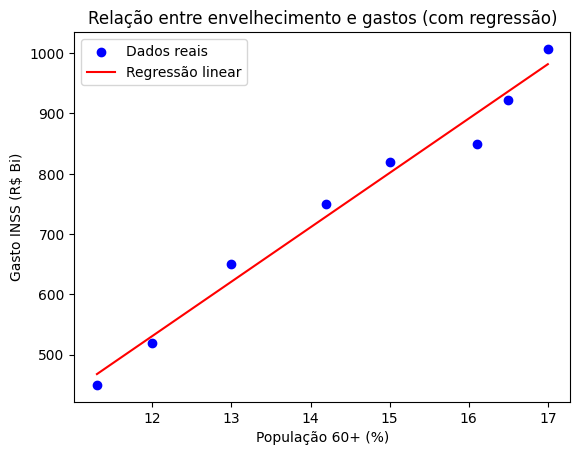

In [24]:
X = df[["Populacao_60+"]]
y = df["Gasto_INSS_R$Bi"]

modelo = LinearRegression()
modelo.fit(X, y)

# Plotando regressão
plt.scatter(X, y, color="blue", label="Dados reais")
plt.plot(X, modelo.predict(X), color="red", label="Regressão linear")
plt.xlabel("População 60+ (%)")
plt.ylabel("Gasto INSS (R$ Bi)")
plt.title("Relação entre envelhecimento e gastos (com regressão)")
plt.legend()
plt.show()


In [25]:
cenarios = [18.5, 20, 22]  # % de idosos em 2030, 2035, 2040
for c in cenarios:
    prev = modelo.predict([[c]])
    print(f"Previsão de gasto INSS com {c}% de idosos:", round(prev[0], 2), "R$ Bi")



Previsão de gasto INSS com 18.5% de idosos: 1116.91 R$ Bi
Previsão de gasto INSS com 20% de idosos: 1252.11 R$ Bi
Previsão de gasto INSS com 22% de idosos: 1432.37 R$ Bi


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


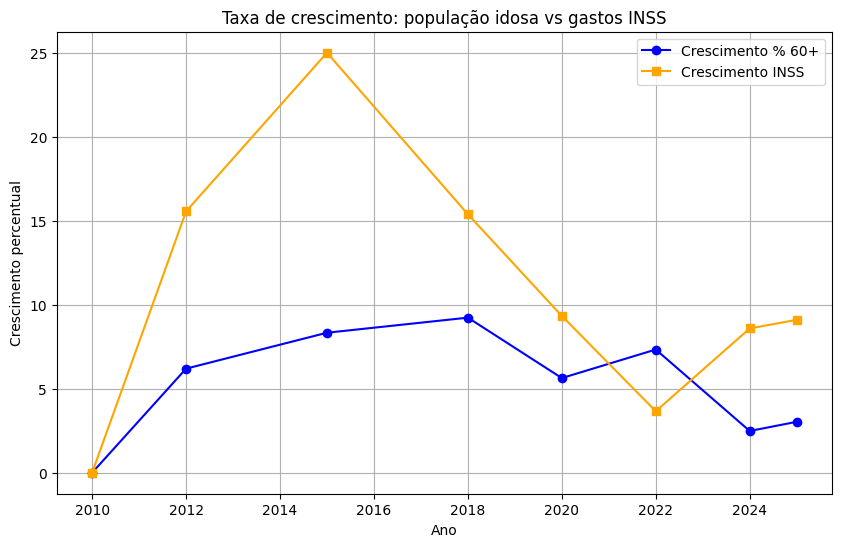

In [26]:
# Garantir que a coluna 'Ano' é numérica
df["Ano"] = pd.to_numeric(df["Ano"], errors="coerce")

# Calcular crescimento percentual corretamente com as colunas que existem
df["Crescimento_60+"] = df["Populacao_60+"].pct_change() * 100
df["Crescimento_INSS"] = df["Gasto_INSS_R$Bi"].pct_change() * 100

# Tratar valores NaN do primeiro período
df[["Crescimento_60+", "Crescimento_INSS"]] = df[["Crescimento_60+", "Crescimento_INSS"]].fillna(0)

# Plot seguro com parâmetros nomeados
plt.figure(figsize=(10,6))
plt.plot(df["Ano"], df["Crescimento_60+"], label="Crescimento % 60+", color="blue", marker="o", linestyle="-")
plt.plot(df["Ano"], df["Crescimento_INSS"], label="Crescimento INSS", color="orange", marker="s", linestyle="-")
plt.xlabel("Ano")
plt.ylabel("Crescimento percentual")
plt.title("Taxa de crescimento: população idosa vs gastos INSS")
plt.legend()
plt.grid(True)
plt.show()
